# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [83]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.utils import shuffle

# Visualizations will be shown in the notebook.
%matplotlib inline

training_file = "data/train.p"
validation_file= "data/valid.p"
testing_file = "data/test.p"
signnames_file = "signnames.csv"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(signnames_file) as f:
    f.readline() # Strip the header
    tuples = [line.strip().split(',') for line in f]
    sign_names = {int(t[0]): t[1] for t in tuples}
    
X_train, y_train = shuffle(train['features'], train['labels'])
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [84]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_valid = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

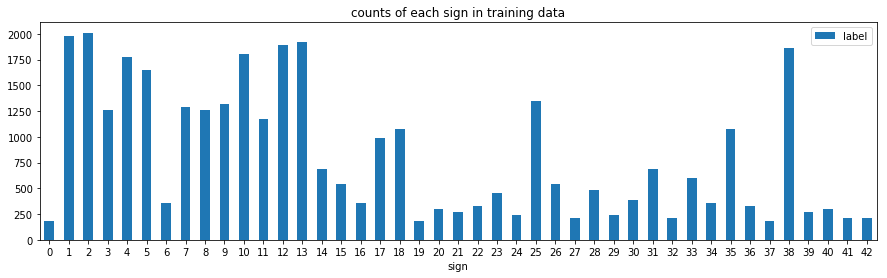

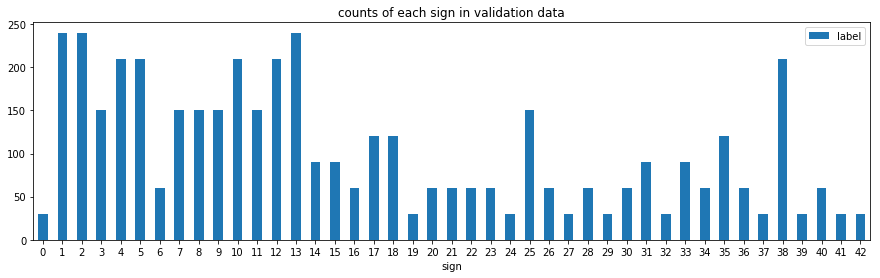

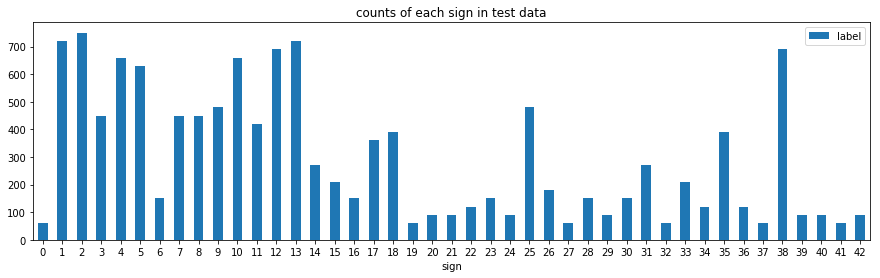

Speed limit (20km/h)


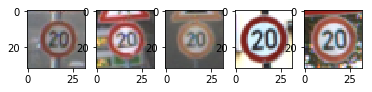

Speed limit (30km/h)


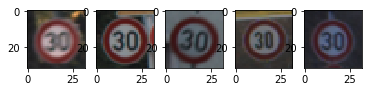

Speed limit (50km/h)


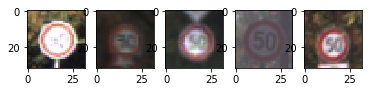

Speed limit (60km/h)


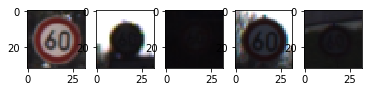

Speed limit (70km/h)


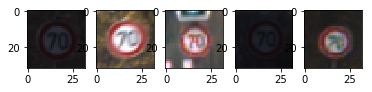

Speed limit (80km/h)


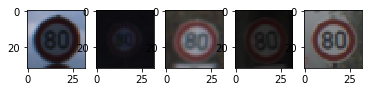

End of speed limit (80km/h)


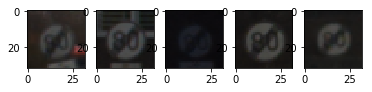

Speed limit (100km/h)


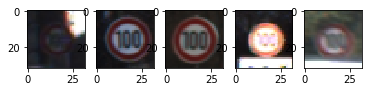

Speed limit (120km/h)


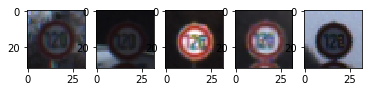

No passing


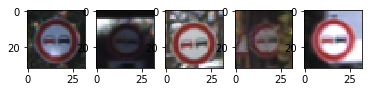

No passing for vehicles over 3.5 metric tons


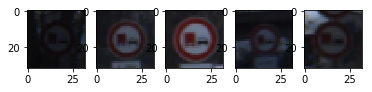

Right-of-way at the next intersection


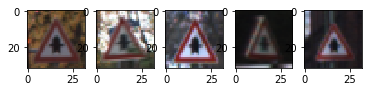

Priority road


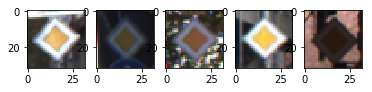

Yield


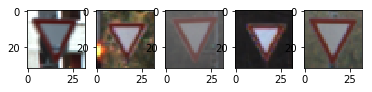

Stop


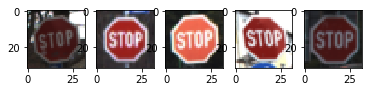

No vehicles


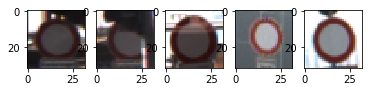

Vehicles over 3.5 metric tons prohibited


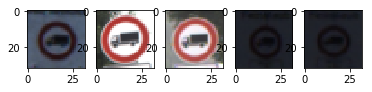

No entry


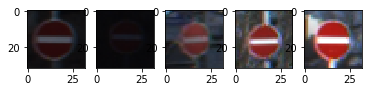

General caution


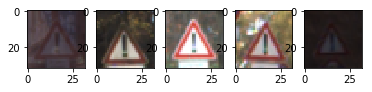

Dangerous curve to the left


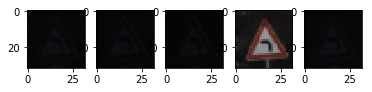

Dangerous curve to the right


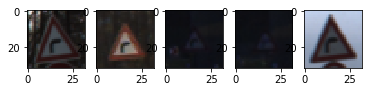

Double curve


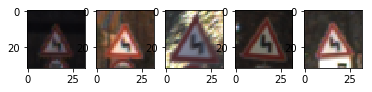

Bumpy road


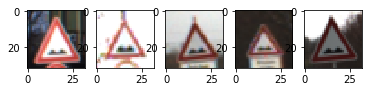

Slippery road


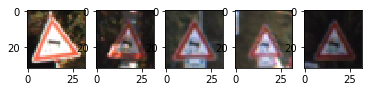

Road narrows on the right


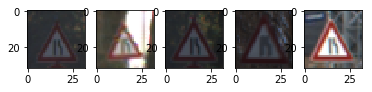

Road work


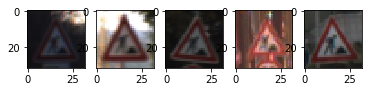

Traffic signals


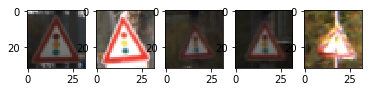

Pedestrians


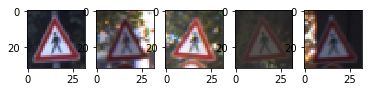

Children crossing


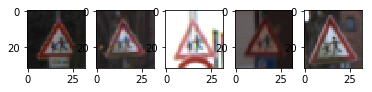

Bicycles crossing


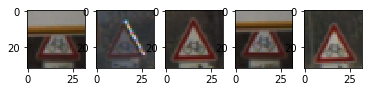

Beware of ice/snow


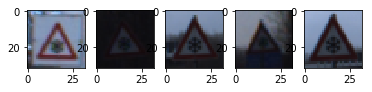

Wild animals crossing


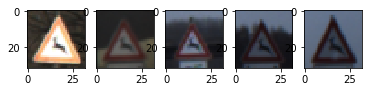

End of all speed and passing limits


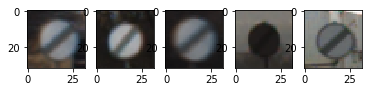

Turn right ahead


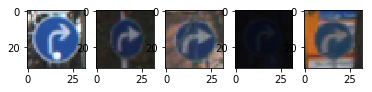

Turn left ahead


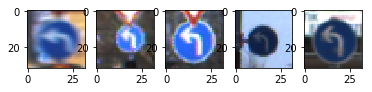

Ahead only


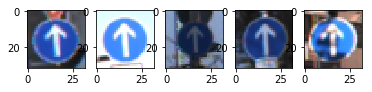

Go straight or right


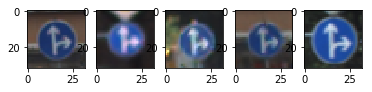

Go straight or left


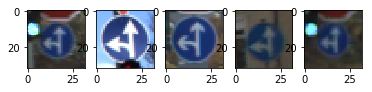

Keep right


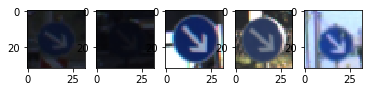

Keep left


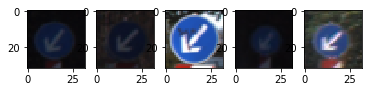

Roundabout mandatory


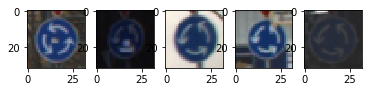

End of no passing


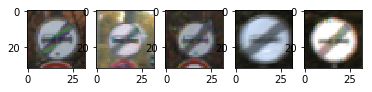

End of no passing by vehicles over 3.5 metric tons


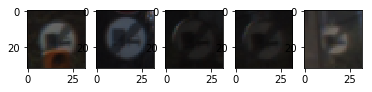

In [87]:
### Data exploration visualization code goes here.

# Plot Training / Validation / Test summary counts
for (data, name) in [[y_train, "training"], [y_valid, "validation"], [y_test, "test"]]:
    df = pd.DataFrame({'label': data})
    counts = df.groupby(['label']).agg({'label': 'count'})
    counts.plot(kind='bar', title="counts of each sign in %s data" % name, figsize=(15,4), rot=0)
    plt.xlabel("sign")
    plt.show()
    
# Gather 5 Example images per label
examples_per_sign = 5
total = 0
example = {}
for (img,label) in zip(X_train, y_train):
    example.setdefault(label, [])
    if len(example[label]) < examples_per_sign:
        example[label].append(img)
        total += 1
    if total == n_classes * examples_per_sign:
        break;

for label in sorted(example.keys()):
    fig = plt.figure()
    print(sign_names[label])
    for i in range(examples_per_sign):
        plt.subplot(1,examples_per_sign,i+1)
        plt.imshow(example[label][i])
    plt.show()




----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Model Architecture

In [86]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def preprocess(images):
    def denoise(img):
        """Denoising did not seem to improve accuracy"""
        return cv2.fastNlMeansDenoisingColored(img, h=10)
        
    def normalize(img_yuv):
        """Normalization did not seem to improve accuracy"""
        
        # Global equalization
        img = img_yuv.copy()
        img[:,:,0] = cv2.equalizeHist(img[:,:,0])

        # Local equalization
        clahe = cv2.createCLAHE(clipLimit=20.0, tileGridSize=(8,8))
        img[:,:,0] = clahe.apply(img[:,:,0])
        
        return img
    
    def convert_to_yuv(img):
        """Conversion into YUV colorspace is effective"""
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    
    return [convert_to_yuv(img) for img in images]

X_train_p = preprocess(X_train)
X_valid_p = preprocess(X_valid)
X_test_p = preprocess(X_test)


# In "Traffic Sign Recognition with Multi-Scale Convolutional Networks", referenced above
# They augmented the dataset by producing 5x permutations on the original training set to
# aid in training
def permute_image(img):
    (w, h) = img.shape[:2]
    center = (w / 2, h / 2)
    rotation = np.random.random()*30-15;  # +/- 15 degrees rotation
    scale = 1.0+np.random.random()*0.2-0.1  # +/- 10% scaling
    M = cv2.getRotationMatrix2D(center, rotation, scale)
    rotated = cv2.warpAffine(img, M, (w, h))
    return rotated

#permutation_factor = 5
#X_train_p += [permute_image(img) for img in X_train_p*permutation_factor]
y_train_p = [cls for cls in y_train]
#y_train_p += [cls for cls in y_train_p*permutation_factor]

In [75]:
### Define your architecture here.

def conv2d(x, output, stride, name):
    weights = tf.Variable(tf.truncated_normal(output), name=name+"_weights")
    biases = tf.Variable(tf.zeros(output[3]), name=name+"_biases")
    strides = [1, stride, stride, 1]
    padding = 'VALID'
    return tf.nn.conv2d(x, weights, strides, padding, name=name+"conv") + biases

def maxpool2d(x, k=2, name=""):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME', 
                          name=name+"_pool")

def fullyconnected(x, output, mu, sigma, name):
    weights = tf.Variable(tf.truncated_normal(output, mu, sigma), name=name+"_weights")
    biases = tf.Variable(tf.zeros(output[1]), name=name+"_biases")
    return tf.add(tf.matmul(x, weights), biases)

def LeNet(x, input_depth=1, n_classes=10):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
        
    # Layer 1: Convolutional. Input = 32x32xinput_depth. Output = 28x28x6.
    layer1 = conv2d(x, (5,5,input_depth,6), 1, name="layer1")
    layer1 = tf.nn.relu(layer1, name="layer1_relu")
    layer1 = maxpool2d(layer1, 2, name="layer1")

    # Layer 2: Convolutional. Output = 10x10x16.
    layer2 = conv2d(layer1, (5,5,6,16), 1, name="layer2")
    layer2 = tf.nn.relu(layer2, name="layer2_relu")
    layer2 = maxpool2d(layer2, 2, name="layer2")
    
    # Flatten. Input = 5x5x16. Output = 400.
    flatten = tf.contrib.layers.flatten(layer2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    layer3 = fullyconnected(flatten, [400, 120], mu, sigma, name="layer3")
    layer3 = tf.nn.relu(layer3, name="layer3_relu")

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    layer4 = fullyconnected(layer3, [120,84], mu, sigma, name="layer4")
    layer4 = tf.nn.relu(layer4, name="layer4_relu")

    #Layer 5: Fully Connected. Input = 84. Output = n_classes.
    logits = fullyconnected(layer4, [84, n_classes], mu, sigma, name="layer5")
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [76]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.0001
input_depth = image_shape[2]

x = tf.placeholder(tf.float32, (None, 32, 32, input_depth), name="X")
y = tf.placeholder(tf.int32, (None), name="y")
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x, input_depth, n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate, name="optimizer")
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(sess, X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

sess = tf.Session()
try:
    saver.restore(sess, './lenet_signs')
except:
    sess.run(tf.global_variables_initializer())

In [ ]:
EPOCHS = 100
BATCH_SIZE = 128
num_examples = len(X_train_p)

print("Training...")
print()
for i in range(EPOCHS):   
    for offset in range(0, num_examples, BATCH_SIZE):
        # Get the batch
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_train_p[offset:end], y_train_p[offset:end]
        
        # Run the training operation
        sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
    validation_accuracy = evaluate(sess, X_valid_p, y_valid)
    print("EPOCH {} ...".format(i+1))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print()
        
saver.save(sess, './lenet_signs')
print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.007

EPOCH 2 ...
Validation Accuracy = 0.048

EPOCH 3 ...
Validation Accuracy = 0.048

EPOCH 4 ...
Validation Accuracy = 0.034

EPOCH 5 ...
Validation Accuracy = 0.034

EPOCH 6 ...
Validation Accuracy = 0.014

EPOCH 7 ...
Validation Accuracy = 0.034

EPOCH 8 ...
Validation Accuracy = 0.048

EPOCH 9 ...
Validation Accuracy = 0.054



In [ ]:
# Accuracy on the training set
# Not stastically useful for generalization, however if we have near-perfect accuracy 
# here, but not on validation and test data that is a signal that we can't keep 
# learning while having overfitted the data.
train_accuracy = evaluate(sess, X_train_p, y_train)
print("Train Accuracy = {:.3f}".format(train_accuracy))

# Evaluate Validation accuracy
valid_accuracy = evaluate(sess, X_valid_p, y_valid)
print("Validation Accuracy = {:.3f}".format(valid_accuracy))

# Evaluate Test accuracy
test_accuracy = evaluate(sess, X_test_p, y_test)
print("Test Accuracy = {:.3f}".format(test_accuracy))

prediction1 = tf.argmax(logits, 1)
img1 = X_test_p
class1 = sess.run(prediction1, feed_dict={x: img1})
print(class1[0:100] == y_test[0:100])


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 